In [2]:
library(clusterProfiler)
library(ggplot2)
library(ggalt)
library(pheatmap)
source("/ifs3/clliu/tools/utils.r")
source("/ifs3/clliu/tools/plot.r")

In [25]:
#H3K9me3
#H3K27me3

for (var in c('H3K9me3','H3K27me3')){
    prefix = var
    sampletype = 'N'

    input = paste0("/ifs3/scdata/4.1ChIPseq/1.width/",prefix,"/",sampletype,"_gene_sample_width.csv")
    outdir = paste0('/ifs3/scdata/4.1ChIPseq/2.enrich/','/',prefix)

    ensure_directory_exists(outdir)
    geneset_filepath = "/ifs3/scdata/4.ChIPseq/2.H3K9me3_H3K27me3_enrich/geneset.gmt"


    #get data and save
    geneWidth = read.csv(input,check.names = FALSE)

    mydata = data.frame()
    n <- length(geneWidth$gene_name)
    splits <- seq(1, n, by=1500)

    mergelist <- lapply(splits, function(i) {
      end <- min(i+1499, n)
      return(geneWidth$gene_name[i:end])
    })
    gene_set = read.gmt(geneset_filepath)
    for (i in 1:length(mergelist)){
        gene_list = mergelist[[i]]

        enrich_result <- enricher(gene_list, 
                               TERM2GENE = gene_set, 
                               pvalueCutoff = 0.05,
                               minGSSize = 1,  # 最小基因集大小
                               maxGSSize = 10000)  # 最大基因集大小
        enrich_result@result$bin = i
        mydata = rbind(enrich_result@result,mydata)
    }
    write.csv(mydata,paste0(outdir,'/',sampletype,'_enrich_result.csv'))
    #vision
    df = mydata[,c(1,6,10)]
    df = df[order(df$bin),]
    df[,'p.adjust'] = -1 * log10(df$p.adjust)
    p=ggplot(data=df,
             aes(x=bin,y=p.adjust,
                 group=ID,colour=ID))+
      geom_point(size=3)+
      labs(x="bin", y="-log10p.adjust")+
      geom_xspline(spline_shape = -0.6)+
      scale_colour_manual(values=phy.cols) +
      create_custom_theme()
    save_png_and_pdf(p,paste0(outdir,'/',sampletype,'_enrich_result'))
}

Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K9me3' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K9me3' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27me3' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27me3' already exists.


In [4]:
#H3K4me3
#H3K27ac

# 方案1
for (var in c('H3K4me3','H3K27ac')){
    prefix = var
    sampletype = 'T'

    input = paste0("/ifs3/scdata/4.1ChIPseq/1.width/",prefix,"/",sampletype,"_gene_sample_width.csv")
    outdir = paste0('/ifs3/scdata/4.1ChIPseq/2.enrich/','/',prefix)

    ensure_directory_exists(outdir)
    geneset_filepath = "/ifs3/scdata/4.ChIPseq/2.H3K9me3_H3K27me3_enrich/geneset.gmt"


    #get data and save
    geneWidth = read.csv(input,check.names = FALSE)

    mydata = data.frame()
    n <- length(geneWidth$gene_name)
    splits <- seq(1, n, by=1500)

    mergelist <- lapply(splits, function(i) {
      end <- min(i+1499, n)
      return(geneWidth$gene_name[i:end])
    })
    gene_set = read.gmt(geneset_filepath)
    for (i in 1:length(mergelist)){
        gene_list = mergelist[[i]]

        enrich_result <- enricher(gene_list, 
                               TERM2GENE = gene_set, 
                               pvalueCutoff = 0.05,
                               minGSSize = 1,  # 最小基因集大小
                               maxGSSize = 10000)  # 最大基因集大小
        enrich_result@result$bin = i
        mydata = rbind(enrich_result@result,mydata)
    }
    write.csv(mydata,paste0(outdir,'/',sampletype,'_enrich_result.csv'))
    #vision
    df = mydata[,c(1,6,10)]
    df = df[order(df$bin),]
    df[,'p.adjust'] = -1 * log10(df$p.adjust)
    p=ggplot(data=df,
             aes(x=bin,y=p.adjust,
                 group=ID,colour=ID))+
      geom_point(size=3)+
      labs(x="bin", y="-log10p.adjust")+
      geom_xspline(spline_shape = -0.6)+
      scale_colour_manual(values=phy.cols) +
      create_custom_theme()
    save_png_and_pdf(p,paste0(outdir,'/',sampletype,'_enrich_result'))
}

Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K4me3' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K4me3' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27ac' already exists.
Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27ac' already exists.


Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27ac' already exists.


[1] TRUE

Directory '/ifs3/scdata/4.1ChIPseq/2.enrich//H3K27ac' already exists.


png 
  2

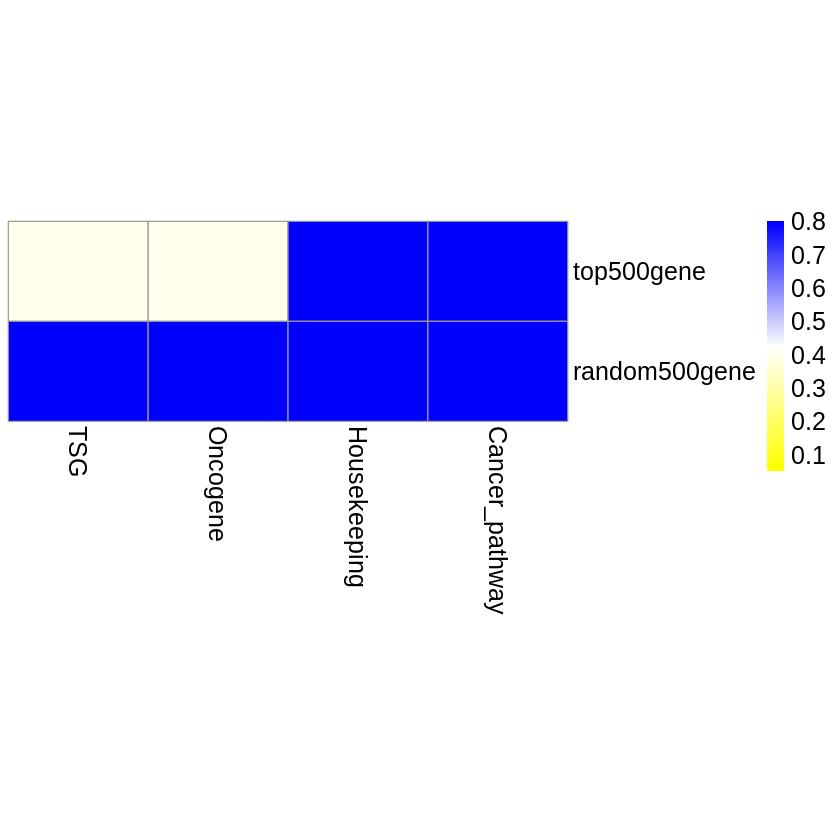

In [73]:
#H3K4me3
#H3K27ac
#方案2
prefix = 'H3K27ac'
sampletype = 'N'

input = paste0("/ifs3/scdata/4.1ChIPseq/1.width/",prefix,"/",sampletype,"_gene_sample_width.csv")
outdir = paste0('/ifs3/scdata/4.1ChIPseq/2.enrich/','/',prefix)

ensure_directory_exists(outdir)
geneset_filepath = "/ifs3/scdata/4.ChIPseq/2.H3K9me3_H3K27me3_enrich/geneset.gmt"

#get data and save
geneWidth = read.csv(input,check.names = FALSE)

set.seed(12345)
top500gene = geneWidth$gene_name[1:500]
random500gene = sample(geneWidth$gene_name,500)

gene_set = read.gmt(geneset_filepath)
top500gene_enrich_result <- enricher(top500gene, 
                           TERM2GENE = gene_set, 
                           pvalueCutoff = 0.05,
                           minGSSize = 1,  # 最小基因集大小
                           maxGSSize = 10000)  # 最大基因集大小

random500gene_enrich_result <- enricher(random500gene, 
                           TERM2GENE = gene_set, 
                           pvalueCutoff = 0.05,
                           minGSSize = 1,  # 最小基因集大小
                           maxGSSize = 10000)  # 最大基因集大小
top500gene_enrich_result@result$genelist = 'top500gene'
random500gene_enrich_result@result$genelist = 'random500gene'

data = rbind(top500gene_enrich_result@result[,c(1,6,10)],random500gene_enrich_result@result[,c(1,6,10)])

write.csv(data,paste0(outdir,'/',sampletype,'_random_And_top500gene_enrich_result.csv'))

df = reshape(data, idvar = "ID", timevar = "genelist", direction = "wide")

df = t(df[,-1])

rownames(df) = c('top500gene','random500gene')

# 使用pheatmap绘制热图，并设置颜色范围
# 自定义颜色映射，从蓝色到红色
my_color_palette <- colorRampPalette(c("yellow", "white","blue" ))(100)
my_breaks <- seq(0.05, 0.8, length.out = 101)
p = pheatmap(df,cluster_rows = FALSE,
         cluster_cols = FALSE,
         cellheight = 60,
         # display_numbers = TRUE,
         fontsize = 15,
             breaks = my_breaks,
        color = my_color_palette)
save_png_and_pdf(p,paste0(outdir,'/',sampletype,'__random_And_top500gene_enrich_result_pheatmap'))